<a href="https://colab.research.google.com/github/kahnchana/CV/blob/master/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1: SVM 

## Code
Import and setup helper function. All code for q1 is below. Visualizations can be found after this. 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def compare_svm_plots(parameters=None):
    """
    Compares effect of gamma and C on the SVM. Reports score on train set (no train / test split).

    Args
    ----------
    parameters:     dict (refer to code below for sample
    """
    # import some data to play with
    iris = datasets.load_iris()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = iris.data[:, :2]
    y = iris.target

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    if parameters is None:
        parameters = {
            'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1e-3, 0.1, 0.5, 0.7, 0.9]
        }

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(len(parameters['C']), len(parameters['gamma']), figsize=(20, 8))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    for i, row in enumerate(sub):
        for j, col in enumerate(row):
            model = svm.SVC(
                kernel='rbf',
                C=parameters['C'][i],
                gamma=parameters['gamma'][j]
            )
            model = model.fit(X, y)
            score = model.score(X, y)
            title = "C:{}, Gamma:{}, \n Score:{:.03f}".format(parameters['C'][i], parameters['gamma'][j], score)

            ax = col

            plot_contours(ax, model, xx, yy,
                          cmap=plt.cm.coolwarm, alpha=0.8)
            ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xlabel('Sepal length')
            ax.set_ylabel('Sepal width')
            ax.set_xticks(())
            ax.set_yticks(())
            ax.set_title(title, fontsize=10)
            ax.axis('off')

    plt.show()


def compare_train_test(parameters=None):
    """
    Compares effect of C and Gamma on the SVM. Train and Test split used for dataset (80-20).
    Reports both train and test scores. Plots show all data points.

    Args
    ----------
    parameters:     dict (refer to code below for sample
    """
    # import some data to play with
    iris = datasets.load_iris()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = iris.data[:, :2]
    y = iris.target

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0, shuffle=True)

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    if parameters is None:
        parameters = {
            'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1e-3, 0.1, 0.5, 0.7, 0.9]
        }

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(len(parameters['C']), len(parameters['gamma']), figsize=(20, 8))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    for i, row in enumerate(sub):
        for j, col in enumerate(row):
            model = svm.SVC(
                kernel='rbf',
                C=parameters['C'][i],
                gamma=parameters['gamma'][j]
            )

            model = model.fit(x_train, y_train)
            train_accuracy = model.score(x_train, y_train)
            test_accuracy = model.score(x_test, y_test)

            title = "C:{}, Gamma:{}, \n train accuracy:{:.03f} \n test accuracy:{:.03f}".format(
                parameters['C'][i], parameters['gamma'][j], train_accuracy, test_accuracy)

            ax = col
            plot_contours(ax, model, xx, yy,
                          cmap=plt.cm.coolwarm, alpha=0.8)
            ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xlabel('Sepal length')
            ax.set_ylabel('Sepal width')
            ax.set_xticks(())
            ax.set_yticks(())
            ax.set_title(title, fontsize=10)
            ax.axis('off')

    plt.show()


## Effect of Gamma and C value on the SVM 

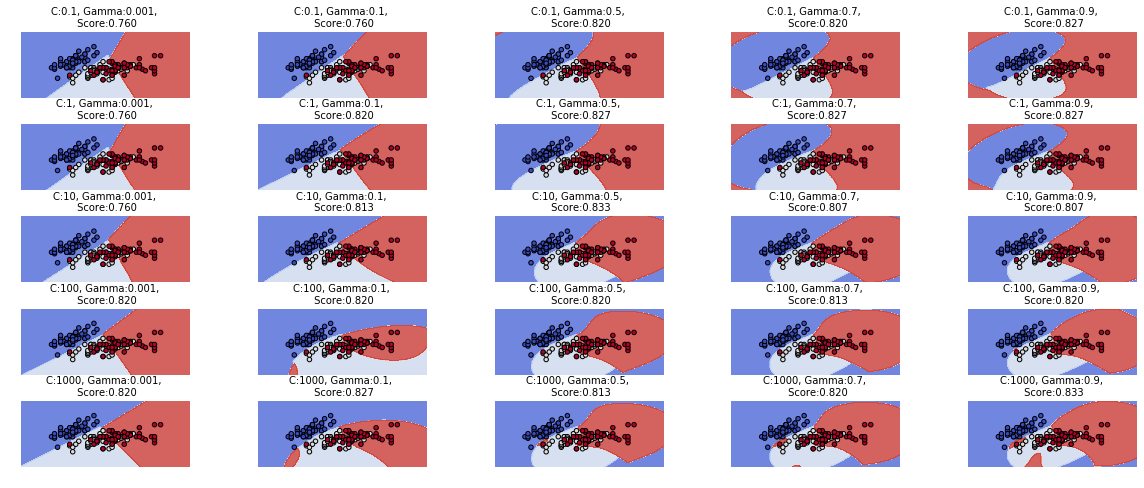

In [0]:
parameters = {
            'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1e-3, 0.1, 0.5, 0.7, 0.9]
        }
compare_svm_plots(parameters)

## Variation of Train / Test scores with Gamma and C

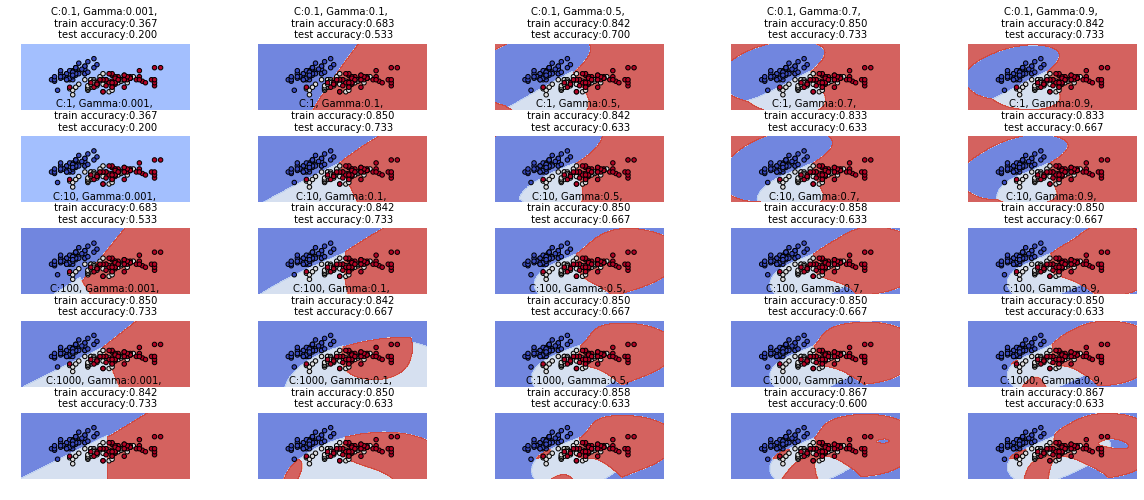

In [0]:
parameters = {
            'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1e-3, 0.1, 0.5, 0.7, 0.9]
        }
compare_train_test(parameters)

### Best Value
gamma:  0.1

C: 10

# Q2: Cifar

## Code
Does the following tasks.
1.   Downloads the dataset
2.   Extract SIFT features for first 1000 train and test images
3.   Build bag of words to identify clusters 
4.   K-Means Clustering and converting feature vectors to histograms
5.   Train the SVM and report train / test accuracies


**Warning:** Running this cell (on colab) may require cv2 to be rebuilt to allow patented algorithms. 



In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 7s 0us/step


In [0]:
import cv2
import numpy as np
from sklearn import svm
from sklearn.cluster import KMeans

# bag of words to identify clusters
train_count = 1000
sift_features = np.empty(shape=(0, 128))
for img in x_train[:train_count, :, :, :]:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    extractor = cv2.xfeatures2d.SIFT_create()
    _, des = extractor.detectAndCompute(gray, None)
    if des is None:
        continue
    assert des.shape[1] == 128, 'wrong shape'
    sift_features = np.concatenate([sift_features, des], axis=0)

# kmeans clustering    
k_means = KMeans(n_clusters=50, random_state=0).fit(sift_features)

# prepare train data
feature_vectors = np.zeros(shape=(train_count, 50))
for i, img in enumerate(x_train[:train_count, :, :, :]):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    extractor = cv2.xfeatures2d.SIFT_create()
    _, des = extractor.detectAndCompute(gray, None)
    if des is None:
        continue
    hist = k_means.predict(des)
    for val in hist:
        feature_vectors[i][val] += 1

# prepare test data
test_vectors = np.zeros(shape=(train_count, 50))
for i, img in enumerate(x_test[:train_count, :, :, :]):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    extractor = cv2.xfeatures2d.SIFT_create()
    _, des = extractor.detectAndCompute(gray, None)
    if des is None:
        continue
    hist = k_means.predict(des)
    for val in hist:
        test_vectors[i][val] += 1

# run experiment
labels = y_train[:train_count, 0]
test_labels = y_test[:train_count, 0]
model = svm.SVC(
                kernel='rbf',
                C=10,
                gamma=0.1
            )
model = model.fit(feature_vectors, labels)
train_accuracy = model.score(feature_vectors, labels)
test_accuracy = model.score(test_vectors, test_labels)

## Visualizing of SIFT features

**Warning:** Running this cell (on colab) may require cv2 to be rebuilt to allow patented algorithms. 

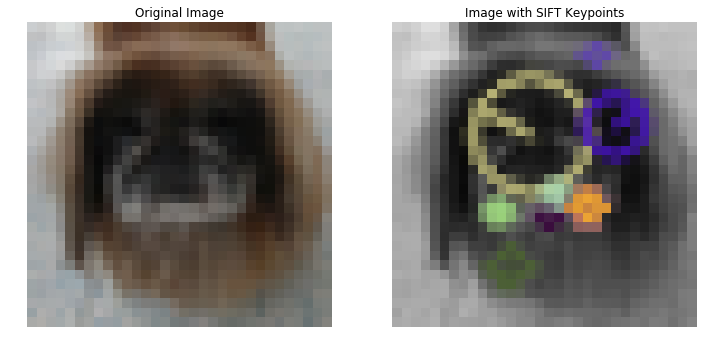

In [0]:
import cv2
from matplotlib import pyploy as plt

img = x_train[1, :, :, :]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
extractor = cv2.xfeatures2d.SIFT_create()
kp, des = extractor.detectAndCompute(gray, None)
img_ = cv2.drawKeypoints(gray, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

_, ax = plt.subplots(1,2, figsize=(12,10))
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[1].imshow(img_)
ax[1].axis('off')
ax[1].set_title("Image with SIFT Keypoints")
plt.show()

## Reporting of Results

In [0]:
print("train_accuracy: {} \n test_accuracy: {}".format(train_accuracy, test_accuracy))

train_accuracy: 0.998 
 test_accuracy: 0.198


# Q3: CVXOPT (repeat Q1)

## Code and Explanation

Functions for computing kernels are on top. The SVM class contains a binary SVM classifier, while the MultiClassSVM class contains a one-vs-rest type multi-class SVM classifier (that simply calls num_classses number of instances of the SVM class). 

The required optimization for the SVM problem is 

min $ \sum_i \sum_j (\alpha_i * y_i * \phi(x_i, x_j) * y_j * \alpha_j)  - \sum \alpha_i $

with constraints:

 * $ \sum_i \alpha_i * y_i  = 0 $ 

 * $ 0 \leq \alpha_i \leq C \; \; \forall \alpha_i $
 
In SVM.fit (for num samples n):
* _P is a matrix such that $ P_{i,j} =  y_i * \phi(x_i, x_j) * y_j $,
* _q is a vector of -1's of length n
* _A is the matrix Y of dimension (1, n)
* b = 0
* _G is a matrix of shape (2n, n) containing two identity matrices -I and I stacked vertically
* _h is a matrix of shape (2n, 1) with n 0's and n C's respectively. 

The function cvxopt.solvers.qp() takes in these arguements and solves the following minimization. 
* minimize $ \frac{1}{2}x^TPx + q^Tx \;$, subject to 
* $G*x <= h$
* $ A*x = b.$

Considering our $\alpha_i$'s as the x vector, the inputs defined above fit into this to solve our required SVM optimization problem. 

**Difference to sklearn:**
This uses the one-vs-rest while they use the one-vs-one method to handle multi-classes. 


In [0]:
import cvxopt
import cvxopt.solvers
import numpy as np
from numpy import linalg
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


def linear_kernel(x1, x2, _=None):
    return np.dot(x1, x2)


def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p


def rbf_kernel(x, y, gamma=0.1):
    return np.exp((-linalg.norm(x - y) ** 2) * gamma)


KERNEL_DICT = {
    "linear": linear_kernel,
    "poly": polynomial_kernel,
    "rbf": rbf_kernel
}


class SVM(object):

    def __init__(self, kernel='rbf', c=None, param=None, verbose=False):
        """
        Initialize SVM Object
        :param kernel:          str (linear / poly / rbf)
        :param c:               regularization term
        :param verbose:         print to console
        :param param:           gamma / polynomial degree parameter
        """
        self.kernel = KERNEL_DICT[kernel]
        self.C = c
        self.param = param
        self.verbose = verbose
        if not verbose:
            cvxopt.solvers.options['show_progress'] = False

        self.a = None
        self.sv = None
        self.sv_y = None
        self.w = None
        self.b = None

    def fit(self, x, y):
        """
        Fitting function
        :param x:       array of shape (num_examples, num_dims)
        :param y:       array of shape (num_examples, )
        :return:        No return
        """
        n_samples, n_features = x.shape

        # Gram matrix
        k_mat = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                k_mat[i, j] = self.kernel(x[i], x[j], self.param)

        _P = cvxopt.matrix(np.outer(y, y) * k_mat)
        _q = cvxopt.matrix(np.ones(n_samples) * -1)
        _A = cvxopt.matrix(y, (1, n_samples), tc='d')
        _b = cvxopt.matrix(0.0)

        if self.C is None:
            _G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            _h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = - np.identity(n_samples)
            tmp2 = np.identity(n_samples)
            _G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            _h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(_P, _q, _G, _h, _A, _b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = x[sv]
        self.sv_y = y[sv]
        if self.verbose:
            print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * k_mat[ind[n], sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, x):
        """
        Helper for predict. Same input as predict.
        :param x:       array of shape (num_examples, num_dims)
        :return:        array of shape (num_examples, )
        """
        if self.w is not None:
            return np.dot(x, self.w) + self.b
        else:
            y_predict = np.zeros(len(x))
            for i in range(len(x)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(x[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, x):
        """
        Predict function
        :param x:       array of shape (num_examples, num_dims)
        :return:        array of shape (num_examples, )
        """
        return np.sign(self.project(x))


class MultiClassSVM:

    def __init__(self, kernel='rbf', c=None, param=None, verbose=False):
        """
        Initialize SVM Object
        :param kernel:          str (linear / poly / rbf)
        :param c:               regularization term
        :param param:           gamma / polynomial degree parameter
        """
        self.kernel = kernel
        self.C = c
        self.param = param
        self.verbose = verbose
        self.classifiers = []
        self.classes = None

    def fit(self, x, y):
        """

        :param x:       array of shape (num_examples, num_dims)
        :param y:       array of shape (num_examples, )
        :return:        No return
        """
        self.classes = np.unique(y)
        for class_id in self.classes:
            classifier = SVM(kernel=self.kernel, c=self.C, param=self.param, verbose=self.verbose)
            y_ = ((y == class_id).astype(float) - 0.5) * 2
            classifier.fit(x, y_)
            self.classifiers.append(classifier)

    def predict(self, x):
        """
        Predict function
        :param x:       array of shape (num_examples, num_dims)
        :return:        array of shape (num_examples, )
        """
        assert len(self.classifiers) > 0, "run fit before prediction"
        scores = np.empty(shape=(x.shape[0], len(self.classifiers)))  # num_examples, num_classes
        for i, classifier in enumerate(self.classifiers):
            score = classifier.project(x)
            scores[:, i] = score
        return np.argmax(scores, axis=1)

## Experiment
The same experiment in Q1 above is repeated for the optimum Gamma / C values as follows. The same results are obtained. 
Previous results: 
* train accuracy: 0.843
* test accuracy : 0.733

In [0]:
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True)

clf = MultiClassSVM(c=10, param=0.1)
clf.fit(x_train, y_train)
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

train_acc = accuracy_score(y_true=y_train, y_pred=train_pred)
test_acc = accuracy_score(y_true=y_test, y_pred=test_pred)

print("train_accuracy: {} \n test_accuracy: {}".format(train_acc, test_accuracy))

train_accuracy: 0.8333333333333334 
 test_accuracy: 0.7333333333333333


# Q4: CVXOPT (repeat Q2)

## Code
Repeating of previous (Q2 above) for feature vector preparation. 

In [0]:
import cv2
import numpy as np
from keras.datasets import cifar10
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# bag of words to identify clusters
train_count = 1000
sift_features = np.empty(shape=(0, 128))
for img in x_train[:train_count, :, :, :]:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    extractor = cv2.xfeatures2d.SIFT_create()
    _, des = extractor.detectAndCompute(gray, None)
    if des is None:
        continue
    assert des.shape[1] == 128, 'wrong shape'
    sift_features = np.concatenate([sift_features, des], axis=0)

# kmeans clustering
k_means = KMeans(n_clusters=50, random_state=0).fit(sift_features)

# prepare train data
feature_vectors = np.zeros(shape=(train_count, 50))
for i, img in enumerate(x_train[:train_count, :, :, :]):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    extractor = cv2.xfeatures2d.SIFT_create()
    _, des = extractor.detectAndCompute(gray, None)
    if des is None:
        continue
    hist = k_means.predict(des)
    for val in hist:
        feature_vectors[i][val] += 1

# prepare test data
test_vectors = np.zeros(shape=(train_count, 50))
for i, img in enumerate(x_test[:train_count, :, :, :]):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    extractor = cv2.xfeatures2d.SIFT_create()
    _, des = extractor.detectAndCompute(gray, None)
    if des is None:
        continue
    hist = k_means.predict(des)
    for val in hist:
        test_vectors[i][val] += 1
        
labels = y_train[:train_count, 0]
test_labels = y_test[:train_count, 0]

## Experiment

Make sure the Q3 cell for defining MultiClassSVM is run already. Note that this will take some time to run, as this code is not optimum (in terms of speed) compared to the sklearn library modules. 

Previous results are as follows:
* train_accuracy: 0.998 
*  test_accuracy: 0.198

In [0]:
model = MultiClassSVM(
                c=10,
                param=0.1,
                verbose=True
            )
model.fit(feature_vectors, labels)
train_pred = model.predict(feature_vectors)
test_pred = model.predict(test_vectors)

train_accuracy = accuracy_score(train_pred, labels)
test_accuracy = accuracy_score(test_pred, test_labels)

print("train_accuracy: {} \n test_accuracy: {}".format(train_acc, test_accuracy))

train_accuracy: 0.999 
 test_accuracy: 0.209


# Q5: NN of Keras

## Code & Experiment

Simply run this code and it will work. 

This is a simple two-layer model with two dense layers of size 512 and num_output_classes. The network could be changed and played around with to obtain performance improvements. 

In [0]:
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.models import Sequential

batch_size = 32
num_classes = 10
epochs = 10
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Using TensorFlow backend.


170500096/170498071 [==============================] - 90s 1us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.8776 - acc: 0.3257 - val_loss: 1.7722 - val_acc: 0.3630
Epoch 2/10
50000/50000 [==============================] - 7s 139us/step - loss: 1.6857 - acc: 0.4026 - val_loss: 1.7588 - val_acc: 0.3731
Epoch 3/10
50000/50000 [==============================] - 6s 128us/step - loss: 1.6017 - acc: 0.4344 - val_loss: 1.6094 - val_acc: 0.4367
Epoch 4/10
50000/50000 [==============================] - 6s 127us/step - loss: 1.5506 - acc: 0.4537 - val_loss: 1.5989 - val_acc: 0.4333
Epoch 5/10
50000/50000 [==============================] - 6s 126us/step - loss: 1.5031 - acc: 0.4728 - val_loss: 1.5318 - val_acc: 0.457

# Q6: Numpy NNet

## Code 

### Base Class for Layers

The class sets up initialization and abstract methods for all layers. 

In [0]:
import numpy as np


class Base:

    def __init__(self, input_dim, units, name):
        """
        Initialization
        :param input_dim:      number of inputs (dimension of previous layer)
        :param units:           number of units (dimension of output)
        :param name:            name of layer
        """
        self.input_dim = input_dim
        self.units = units
        self.name = name
        self.weights = np.random.random(size=(input_dim, units))
        self.bias = np.random.random(size=(units,))
        self.current_input = None

    def __repr__(self):
        return "{} : Layer with {} inputs and {} units".format(self.name, self.input_dim, self.units)

    def forward(self, inputs):
        """
        Performs forward pass on this layer
        :param inputs:          np.array of shape (batch, input_dim) containing the inputs to layer
                                (output of previous layer)
        :return:                np.array of shape (batch, units) containing outputs of the layer
        """

        raise NotImplementedError('To be implemented by a subclass')

    def backward(self, de_do, lr):
        """
        Performs backward pass and updates the weights & bias
        :param de_do:           np.array of shape (units, ) containing d_Error / d_output
        :param lr:              np.float32 (learning rate)
        :return:                np.array of shape (input_dim, ) containing d_Error / d_input
        """
        raise NotImplementedError('To be implemented by a subclass')

### Classes for Dense / Relu Layers and NNet
The Dense and Relu layers define forward and backward passes. The NNet class has methods for adding layers, running a forward/backward pass through entire network, and training the model end-to-end. 

In [0]:
from tqdm import tqdm


class Dense(Base):
    """
    Class for Fully Connected Layer
    """

    def forward(self, inputs):
        self.current_input = inputs
        return inputs @ self.weights + self.bias

    def backward(self, de_do, lr):
        inputs = np.sum(self.current_input, axis=0)  # shape (input_dim, )
        de_dw = np.outer(inputs, de_do)  # shape (input_dim, units)
        self.weights = self.weights - lr * de_dw
        self.bias = self.bias - lr * de_do
        de_di = np.sum(self.weights * de_do, axis=-1)
        return de_di


class ReLu(Base):
    """
    Class for Rectified Linear (ReLu) layer.
    """

    def forward(self, inputs):
        self.current_input = inputs
        return inputs * (inputs > 0)

    def backward(self, de_do, lr):
        de_do = np.sum(de_do, axis=0)
        return (self.current_input > 0).astype(float) * de_do


class NNet:
    """
    Class for NNets training.
    """

    def __init__(self, batch_size, input_dim, name="NNet"):
        self.batch_size = batch_size
        self.input_dim = input_dim
        self.model = []
        self.name = name
        self.lr = None
        self.out_dim = None
        self.loss_func = self.l1_loss

    def __repr__(self):
        return self.name

    def add_layer(self, layer):
        if len(self.model) > 0:
            assert self.model[-1].units == layer.input_dim, "invalid layer shape"
        else:
            assert self.input_dim == layer.input_dim, "invalid layer shape"

        self.model.append(layer)

    def forward(self, x):
        assert x.shape == (self.batch_size, self.input_dim)
        out = x
        for layer in self.model:
            out = layer.forward(out)
        if self.out_dim is None:
            self.out_dim = out.shape[-1]
        return out

    def backward(self, x, y_true):
        y_pred = self.forward(x)
        de_dy = self.loss_func(y_true=y_true, y_pred=y_pred)
        de_do = de_dy
        for layer in reversed(self.model):
            try:
                if len(de_do.shape) > 1:
                    de_do = np.sum(de_do, axis=0)
                de_di = layer.backward(de_do, self.lr)
            except ValueError as e:
                print("error in {}".format(layer))
                raise e
            de_do = de_di

    def train(self, x, y, num_iterations, lr=0.001, interval=100):
        self.lr = lr
        for i in range(num_iterations):
            self.backward(x, y)
            y_p = self.forward(x)
            if i % interval == 0:
                print("step {} - loss: {:.2f}, accuracy: {:.2f}".format(
                    i,
                    self.loss_func(y, y_p, as_num=True),
                    self.accuracy(y, y_p)
                ))

    def train_batch(self, x, y, epochs, batch_size=4, lr=0.001):
        self.lr = lr
        for i in range(epochs):
            assert x.shape[0] == y.shape[0], 'invalid data arrays'
            with tqdm(range(0, x.shape[0], batch_size)) as t:
                for batch_id in t:
                    x_, y_ = x[batch_id:batch_id + batch_size, :], y[batch_id:batch_id + batch_size, :]
                    assert x_.shape[0] == y_.shape[0], 'invalid data arrays'
                    self.backward(x_, y_)
                    t.set_description('step {}'.format(batch_id))
                    y_p = self.forward(x[batch_id:batch_id + batch_size, :])
                    t.set_postfix(loss=self.loss_func(y_, y_p, as_num=True),
                                  accuracy=self.accuracy(y_, y_p))

    def set_loss(self, loss_func):
        if loss_func == "cross_entropy":
            self.loss_func = self.cross_entropy
        elif loss_func == 'l1':
            self.loss_func = self.l1_loss

    @staticmethod
    def accuracy(y, y_p):
        return np.average(np.isclose(y, y_p))

    @staticmethod
    def l1_loss(y_true, y_pred, as_num=False):
        if as_num:
            return np.sum((y_pred - y_true)).ravel()[0]
        return np.sum((y_pred - y_true), axis=0)

    @staticmethod
    def cross_entropy(y_pred, y_true, epsilon=1e-12, as_num=False):
        """
        Computes cross entropy between targets (encoded as one-hot vectors)
        and predictions.
        Input: predictions (N, k) ndarray
               targets (N, k) ndarray
        Returns: scalar
        """
        y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
        N = y_pred.shape[0]
        ce = -np.sum(y_true * np.log(y_pred + 1e-9)) / N
        if as_num:
            return ce.ravel()[0]
        return ce


## Experiment: Test

In [0]:
def test_nn():
    n = NNet(batch_size=1, input_dim=3)
    n.add_layer(Dense(input_dim=3, units=3, name='l1'))
    n.add_layer(ReLu(input_dim=3, units=3, name='r1'))
    n.add_layer(Dense(3, 2, 'l2'))
    x = np.array([[0.5, 1.2, 3.5]])
    y = np.array([[1.0, 2.0]])
    y_p = n.forward(np.array(x))
    assert y.shape == y_p.shape, "invalid output shape"
    n.train(x, y, num_iterations=5000, interval=500)

test_nn()

step 0 - loss: 9.17, accuracy: 0.00
step 500 - loss: 0.01, accuracy: 0.00
step 1000 - loss: 0.00, accuracy: 0.00
step 1500 - loss: 0.00, accuracy: 1.00
step 2000 - loss: 0.00, accuracy: 1.00
step 2500 - loss: 0.00, accuracy: 1.00
step 3000 - loss: 0.00, accuracy: 1.00
step 3500 - loss: 0.00, accuracy: 1.00
step 4000 - loss: 0.00, accuracy: 1.00
step 4500 - loss: 0.00, accuracy: 1.00


## Experiment: train CIFAR

Seems to take too long to converge. A more complex model may be needed. 

In [0]:
def cifar(epochs=10):
    from keras.datasets import cifar10
    from keras.utils import to_categorical
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train, x_test = x_train.reshape(x_train.shape[0], -1), x_test.reshape(x_test.shape[0], -1)
    num_classes = len(np.unique(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    batch_size = 4
    dims = x_train.shape[-1]
    lr = 0.001

    n = NNet(batch_size=batch_size, input_dim=dims)
    n.add_layer(Dense(input_dim=dims, units=512, name='fc_1'))
    n.add_layer(ReLu(input_dim=512, units=512, name='relu_1'))
    n.add_layer(Dense(input_dim=512, units=num_classes, name='fc_2'))

    n.set_loss('cross_entropy')

    assert y_train.shape[-1] == num_classes, 'invalid label shape'
    n.train_batch(x=x_train, y=y_train, epochs=epochs, batch_size=batch_size, lr=lr)
    